In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
print('Packages imported...')

Packages imported...


In [2]:
df = pd.read_csv('results-20210427-222733.csv')
df

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,volkswagen,diesel,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2261,ohc,four,97,idi,23.0,52,37,46,7775
199,volkswagen,diesel,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,23.0,52,37,46,7995
200,volkswagen,diesel,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,23.0,68,37,42,9495
201,volkswagen,diesel,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,23.0,68,33,38,13845


In [3]:
df.describe()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,98.782759,173.999015,65.901478,53.733498,2555.921182,126.857143,10.452315,104.256158,25.241379,30.748768,12982.477833
std,6.045680,12.385511,2.154835,2.442864,523.205555,41.845239,5.792528,39.714369,6.570702,6.920406,8111.953571
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,97.000000,8.550000,70.000000,19.000000,25.000000,7649.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,9.000000,95.000000,24.000000,30.000000,10245.000000
75%,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,9.400000,116.000000,30.000000,35.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,70.000000,288.000000,49.000000,54.000000,45400.000000


In [4]:
df.isnull().sum()

make                 0
fuel_type            0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [5]:
df['num_of_doors'] = df['num_of_doors'].fillna('unknown')

In [6]:
df['drive_wheels'] = df['drive_wheels'].str.strip()

In [7]:
df[df['price']==0]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
9,audi,gas,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,7.0,160,16,22,0
44,isuzu,gas,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,9.6,70,38,43,0
45,isuzu,gas,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,9.6,70,38,43,0
117,porsche,gas,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,10.0,288,17,28,0


In [8]:
# replace zero values with average of each class
mask = df['horsepower']==288
df.loc[mask,'price'] = 26547

df.loc[9,'price']=15235
df.loc[44:45,'price']= 6241

### Lets analize the DataSet

<AxesSubplot:xlabel='num_of_cylinders', ylabel='count'>

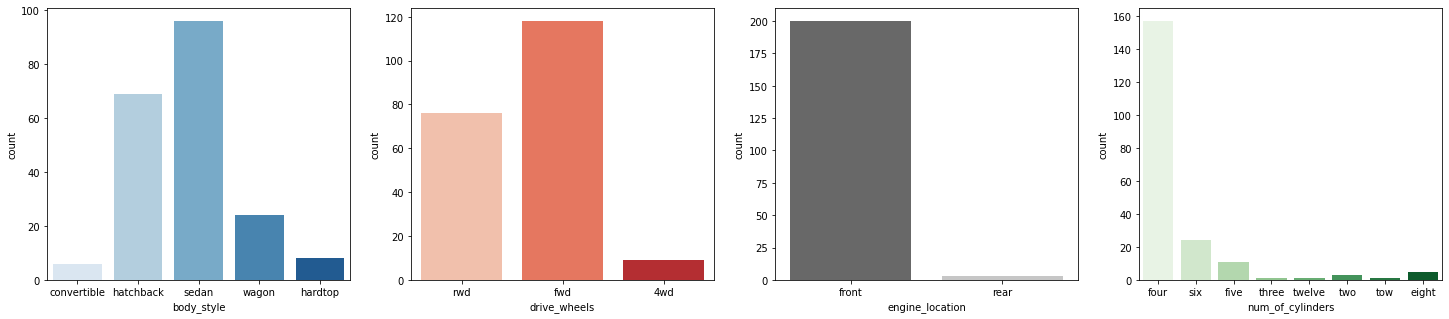

In [9]:
fig, axs=plt.subplots(ncols=4, figsize=(25,5))
sns.countplot(x='body_style', data=df, palette='Blues', ax=axs[0])
sns.countplot(x='drive_wheels', data=df, palette='Reds', ax=axs[1])
sns.countplot(x='engine_location', data=df, palette='Greys_r', ax=axs[2])
sns.countplot(x='num_of_cylinders', data=df, palette='Greens', ax=axs[3])

- We can see that most popular type of cars in our dataset are sedans followed by hatchback's
- Most of the cars are FWD, a very small amount is 4wd,
- Most engines are on the front 
- Most of the cars have four cylinder, they are basic cars



In [10]:
df[df['horsepower']==288]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
117,porsche,gas,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,10.0,288,17,28,26547


### Most economic according to the data is a Mercedes Benz

In [11]:
df.city_mpg.describe()
df[df['highway_mpg']==16]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
67,mercedes-benz,gas,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,8.0,184,14,16,40960
68,mercedes-benz,gas,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,8.0,184,14,16,45400


In [12]:
dict ={}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
pd.DataFrame(dict, index=['unique_count']).T

,unique_count
make,21
fuel_type,2
num_of_doors,3
body_style,5
drive_wheels,3
engine_location,2
wheel_base,52
length,74
width,43
height,48


## Price Prediction

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error


In [14]:
continuos = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'horsepower', 'compression_ratio', 'city_mpg', 'highway_mpg']
categorical = ['make','fuel_type','num_of_doors', 'body_style','drive_wheels','engine_location', 'engine_type', 'num_of_cylinders','fuel_system']
target = ['price']

In [15]:
df[continuos].describe().T

,count,mean,std,min,25%,50%,75%,max
wheel_base,203.0,98.782759,6.045680,86.6,94.50,97.0,102.4,120.9
length,203.0,173.999015,12.385511,141.1,166.30,173.2,183.3,208.1
width,203.0,65.901478,2.154835,60.3,64.05,65.5,66.9,72.3
height,203.0,53.733498,2.442864,47.8,52.00,54.1,55.5,59.8
curb_weight,203.0,2555.921182,523.205555,1488.0,2145.00,2414.0,2943.5,4066.0
engine_size,203.0,126.857143,41.845239,61.0,97.00,119.0,143.0,326.0
horsepower,203.0,104.256158,39.714369,48.0,70.00,95.0,116.0,288.0
compression_ratio,203.0,10.452315,5.792528,7.0,8.55,9.0,9.4,70.0
city_mpg,203.0,25.241379,6.570702,13.0,19.00,24.0,30.0,49.0
highway_mpg,203.0,30.748768,6.920406,16.0,25.00,30.0,35.0,54.0


In [16]:

df1 = pd.get_dummies(df, columns = categorical, drop_first=True)
df1.head()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,...,num_of_cylinders_tow,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,88.6,168.8,64.1,48.8,2548,130,9.0,111,21,27,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,9.0,111,21,27,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,9.0,154,19,26,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,70.0,102,24,30,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,8.0,115,18,22,...,0,0,0,0,0,0,0,1,0,0


In [17]:
x = df1.drop(['price'], axis=1)
y = df1[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)
print("The shape of X_train is      ", x_train.shape)
print("The shape of X_test is       ",x_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (162, 60)
The shape of X_test is        (41, 60)
The shape of y_train is       (162, 1)
The shape of y_test is        (41, 1)


### Support Vector Machines

In [18]:
clf = SVC(kernel='linear', C=1, random_state=3).fit(x_train, y_train)
# Prediction*
y_predict = clf.predict(x_test)

mean_absolute_error(y_test, y_predict)

2853.8536585365855

In [19]:
y_predict

array([15985, 37028,  6488, 15690,  7895,  5572, 16845,  5195,  7609,
        6695, 14489, 15690, 19045, 22470, 35550,  8948, 15040,  7463,
       14489, 30760,  8195, 16630,  6529,  9960,  8845, 37028, 22625,
       15510, 11199, 16515,  6795, 12629,  8358,  7957, 11259, 16515,
        6989,  7609, 12764, 15690, 16515])

In [20]:
price_model = RandomForestRegressor(random_state=9)
price_model.fit(x_train, y_train)
yi_predict = price_model.predict(x_test)
    
    
mean_absolute_error(y_test, y_predict)
# print(f'Hisghest prediction, {np.max(prediction)}, Random State: {1+prediction.index(np.max(prediction))}')

2853.8536585365855

In [24]:
from sklearn.ensemble import RandomForestClassifier
price_model = RandomForestClassifier(random_state=3,n_estimators=4000, oob_score=True)

price_model.fit(x_train, y_train)
y_predict=price_model.predict(x_test)

mean_absolute_error(y_test, y_predict)


1909.9756097560976

In [ ]:
df.columns

In [88]:
dct={}
brand = input('Enter Car Brand ')

fuel_type = input('Enter Fuel Type ')

num_of_doors = input('Number of doors ')

body_style = input('Body Style (sedan, hatcback, etc) ')
drive_wheels = input('Drive wheel (4wd, fwd, etc) ')
egine_location = input('Engine Location ')
wheel_base = input('Wheel Base (86-120) ')
length = input('Length (141 - 208) ')
width = input('Width (60-72) ')
height = input('Height (47-59) ')
curb_weight = input('Curb Weight (1488-4066) ')
engine_type = input('Engine type')
num_of_cylinders = input('Number of cylinders ')
engine_size = input('Engine size ')

fuel_system = input('Fuel System () ')
compression_ratio = input('Compression Ratio (7-70) ')
horse_power = input('horse power ')
city_mpg = input('city mpg ')
high_mpg = input('Highway mpg ')

dct['make']=brand
dct['fuel_type']=fuel_type
dct['num_of_doors']=num_of_doors
dct['body_style'] = body_style
dct['drive_wheels']=drive_wheels
dct['engine_location']=egine_location
dct['wheel_base']=wheel_base
dct['length']=length
dct['width']=width
dct['height']=height
dct['curb_weight']=curb_weight
dct['engine_type']=engine_type
dct['num_of_cylinders']=num_of_cylinders
dct['engine_size']=engine_size
dct['fuel_system']=fuel_system
dct['compression_ratio']=compression_ratio
dct['horsepower']=horse_power
dct['city_mpg']=city_mpg
dct['high_mpg']=high_mpg

Enter Car Brand bmw
Enter Fuel Type diesel
Number of doors four
Body Style (sedan, hatcback, etc) wagon
Drive wheel (4wd, fwd, etc) 4wd
Engine Location front
Wheel Base (86-120) 100
Length (141 - 208) 200
Width (60-72) 70
Height (47-59) 58
Curb Weight (1488-4066) 3504
Engine typeohc
Number of cylinders six
Engine size 190
Fuel System () idi
Compression Ratio (7-70) 66
horse power 200
city mpg 15
Highway mpg 23


In [90]:
dct['make']=brand
dct['fuel_type']=fuel_type
dct['num_of_doors']=num_of_doors
dct['body_style'] = body_style
dct['drive_wheels']=drive_wheels
dct['engine_location']=egine_location
dct['wheel_base']=wheel_base
dct['length']=length
dct['width']=width
dct['height']=height
dct['curb_weight']=curb_weight
dct['engine_type']=engine_type
dct['num_of_cylinders']=num_of_cylinders
dct['engine_size']=engine_size
dct['fuel_system']=fuel_system
dct['compression_ratio']=compression_ratio
dct['horsepower']=horse_power
dct['city_mpg']=city_mpg
dct['highway_mpg']=high_mpg

In [91]:
audi = pd.DataFrame(dct, index=[1])
audi.wheel_base = pd.to_numeric(audi.wheel_base)
audi.length = pd.to_numeric(audi.length)
audi.width = pd.to_numeric(audi.width)
audi.height = pd.to_numeric(audi.height)
audi.curb_weight = pd.to_numeric(audi.curb_weight)
audi.engine_size = pd.to_numeric(audi.engine_size)
audi.compression_ratio = pd.to_numeric(audi.compression_ratio)
audi.horsepower = pd.to_numeric(audi.horsepower,)
audi.city_mpg = pd.to_numeric(audi.city_mpg)
audi.high_mpg = pd.to_numeric(audi.high_mpg)

In [87]:
df.body_style.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [92]:
audi

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,high_mpg,width,highway_mpg
1,bmw,diesel,four,wagon,4wd,front,100,200,58,3504,ohc,six,190,idi,66,200,15,23,70,23


In [93]:
df2 = df.append(audi, ignore_index=True )
df2

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price,high_mpg
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495.0,NaN
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500.0,NaN
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500.0,NaN
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950.0,NaN
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,volkswagen,diesel,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,23.0,52,37,46,7995.0,NaN
200,volkswagen,diesel,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,23.0,68,37,42,9495.0,NaN
201,volkswagen,diesel,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,23.0,68,33,38,13845.0,NaN
202,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,23.0,106,26,27,22470.0,NaN


In [94]:
df2 = df2.drop(columns='high_mpg')

In [95]:
df2 = pd.get_dummies(df2, columns = categorical)
df2.head()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,num_of_doors_four,num_of_doors_two,num_of_doors_unknown,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_eight,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_tow,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,88.6,168.8,64.1,48.8,2548,130,9.0,111,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,9.0,111,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,9.0,154,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,70.0,102,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,8.0,115,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [96]:
x = df2.drop(['price'], axis=1)
y = df2[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [97]:
pd.set_option('display.max_columns', None)

p = df2.iloc[[203]]
p= p.drop(columns='price')
p.isnull()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,num_of_doors_four,num_of_doors_two,num_of_doors_unknown,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_eight,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_tow,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
y_train = y_train.drop(index=203)

In [99]:
x_train = x_train.drop(index=203)

In [100]:
price_model = RandomForestClassifier(random_state=3,n_estimators=4000, oob_score=True)

price_model.fit(x_train, y_train)
y_predict=price_model.predict(p)

y_predict

array([36880.])

In [101]:
dct

{'make': 'bmw',
 'fuel_type': 'diesel',
 'num_of_doors': 'four',
 'body_style': 'wagon',
 'drive_wheels': '4wd',
 'engine_location': 'front',
 'wheel_base': '100',
 'length': '200',
 'height': '58',
 'curb_weight': '3504',
 'engine_type': 'ohc',
 'num_of_cylinders': 'six',
 'engine_size': '190',
 'fuel_system': 'idi',
 'compression_ratio': '66',
 'horsepower': '200',
 'city_mpg': '15',
 'high_mpg': '23',
 'width': '70',
 'highway_mpg': '23'}